In [8]:
# Install required packages in the current Jupyter kernel
# Uncomment the following lines if you need to install these libraries
# If you run into permission issues, try with the --user option
# import sys
# !pip install -q rdflib networkx matplotlib
# !{sys.executable} -m pip install rdflib networkx matplotlib --user
!pip install rdflib
# Imports
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections

  Using cached https://files.pythonhosted.org/packages/3c/fe/630bacb652680f6d481b9febbb3e2c3869194a1a5fc3401a4a41195a2f8f/rdflib-4.2.2-py3-none-any.whl


In [46]:
# RDF graph loading
path = input("Path or URI of the RDF graph to load: ")
rg = RDFGraph()
rg.parse(path, format='turtle')
print("rdflib Graph loaded successfully with {} triples".format(len(rg)))

Path or URI of the RDF graph to load: https://raw.githubusercontent.com/albertmeronyo/lodapi/master/ghostbusters.ttl


NameError: name 'RDFGraph' is not defined

In [44]:
# Subgraph construction (optional)
#entity = input("Entity type to build nodes of the subgraph with: ", 
entity="http://dbpedia.org/ontology/Band"
#relation = input("Relation type to build edges of the subgraph with: ",)
relation= " http://dbpedia.org/ontology/influencedBy"
# TODO: Use entity and relation as parameters of a CONSTRUCT query
query="""
PREFIX bsbm: <http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/>
CONSTRUCT {{ ?u a {} . ?u {} ?v }} WHERE {{ ?u a {} . ?u {} ?v }}""".format(entity, relation, entity, relation)
print(query)
subg = rg.query(query)
rg = subg
#for row in rg:
#    print('%s' % row)


PREFIX bsbm: <http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/>
CONSTRUCT { ?u a http://dbpedia.org/ontology/Band . ?u  http://dbpedia.org/ontology/influencedBy ?v } WHERE { ?u a http://dbpedia.org/ontology/Band . ?u  http://dbpedia.org/ontology/influencedBy ?v }


NameError: name 'rg' is not defined

In [45]:
G = rdflib_to_networkx_graph(rg)
print("networkx Graph loaded successfully with length {}".format(len(G)))

NameError: name 'rdflib_to_networkx_graph' is not defined

In [35]:
#do not consider for now
from __future__ import print_function
from collections import defaultdict
from networkx.algorithms import community
import random

import network
import utils
class Partitioner(object):
    def __init__(self, graph):
        self.graph = graph

    @utils.timeit
    def community_detection(self):
        partition = community.best_partition(self.graph)
        cd_dict = defaultdict(set)
        for p in partition:
            cd_dict[partition[p]].add(p)
        return cd_dict.values()

    @utils.timeit
    def metis_partition(self, parts):
        edgecuts, metis_list = nxmetis.partition(self.graph, parts)
        metis_set_list = [set(l) for l in metis_list]
        return metis_set_list

    @utils.timeit
    def random_partition(self, parts):
        node_list = self.graph.nodes()
        random.shuffle(node_list)

        def chunks(l, n):
            for i in xrange(0, len(l), n):
                yield set(l[i : i + n])

        rnd_list = list(chunks(node_list, len(node_list) / parts))
        return rnd_list

    def get_neighbor_set(self, node_id):
        neighbor_list = self.graph.neighbors(node_id)
        return set(neighbor_list)

    def get_local_set(self, partition_list, node_id):
        for partition_set in partition_list:
            if node_id in partition_set:
                neighbor_set = self.get_neighbor_set(node_id)
                local_set = neighbor_set.intersection(partition_set)
                return local_set
        assert False and "node_id={}".format(node_id)

    def locality_percentage(self, partition_list, note_set):
        local = 0
        total = 0
        for node_id in note_set:
            local_set_size = self.get_local_set(partition_list, node_id)
            local += len(local_set_size)
            total += len(self.graph.neighbors(node_id))
        return float(local) / float(total)

    @staticmethod
    def dump_partition(partition_list):
        for d in partition_list:
            print(d)


if __name__ == "__main__":
    name = "facebook"
    gzip_fname = utils.get_gzip_fname("facebook")
    s = network.Network.from_combined(name, gzip_fname)
    p = Partitioner(s.graph)
    cd_partition = p.community_detection()
    parts = len(cd_partition)
    ego_list = utils.collect_ego_list(name)
    print(ego_list)
    cd_locality = p.locality_percentage(cd_partition, ego_list)
    print(cd_locality)
    metis_partition = p.metis_partition(parts)
    metis_locality = p.locality_percentage(metis_partition, ego_list)
    print(metis_locality)
    rnd_partition = p.random_partition(parts)
    rnd_locality = p.locality_percentage(rnd_partition, ego_list)
    print(rnd_locality)

ModuleNotFoundError: No module named 'nxmetis'

NETWORK SIZE
The network has 9012 nodes and 50030 edges

PENDANTS
The network has 61 pendants

DENSITY
The network density is 0.0012321577863382738

DEGREE CENTRALITY
The mean degree centrality is 0.0012321577863381047, with stdev 0.015118593860648264
The maximum node is http://example.org/midi/NoteOnEvent, with value 0.8997891465986018
The minimum node is 124, with value 0.00011097547442015315
(0.8997891465986018, 0.6549772500277439, 0.47075796249028967, 0.354344689823549, 0.3527910331816669, 0.278992342692265, 0.2653423593385862, 0.18654977250027743, 0.18610587060259684, 0.157252247253357, 0.14116080346243481, 0.1283986239041172, 0.12473643324825213, 0.11574741982021973, 0.1056486516479858, 0.10276328931306182, 0.06325602041948729, 0.05970480523804239, 0.05659749195427811, 0.05426700699145489, 0.04771945400066585, 0.046387748307624016, 0.0459438464099434, 0.03662190655865054, 0.03373654422372656, 0.030851181888802575, 0.029741427144601044, 0.024858506270114305, 0.02075241371656864, 0

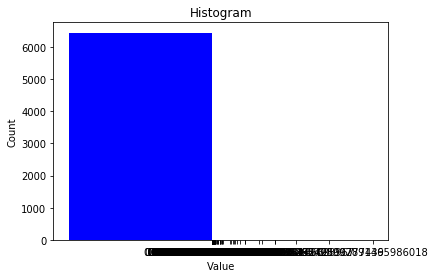

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [15]:
# Analysis

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def number_of_pendants(g):
    """
    Equals the number of nodes with degree 1
    """
    pendants = 0
    for u in g:
        if g.degree[u] == 1:
            pendants += 1
    return pendants


def histogram(l):
    degree_sequence = sorted([d for n, d in list(l.items())], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    print(deg, cnt)
    
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Histogram")
    plt.ylabel("Count")
    plt.xlabel("Value")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

# Network size
print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()

# Network size
print("PENDANTS")
print("============")
print("The network has {} pendants".format(number_of_pendants(G)))
print()

# Density
print("DENSITY")
print("============")
print("The network density is {}".format(nx.density(G)))
print()

# Degree centrality -- mean and stdev
dc = nx.degree_centrality(G)
degrees = []
for k,v in dc.items():
    degrees.append(v)
    
print("DEGREE CENTRALITY")
print("=================")
print("The mean degree centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(dc, key=dc.get), max(dc.values())))
print("The minimum node is {}, with value {}".format(min(dc, key=dc.get), min(dc.values())))
histogram(dc)
print()

# Eigenvector centrality -- mean and stdev
ec = nx.eigenvector_centrality(G)
degrees = []
for k,v in ec.items():
    degrees.append(v)
    
print("EIGENVECTOR CENTRALITY")
print("======================")
print("The mean network eigenvector centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(ec, key=ec.get), max(ec.values())))
print("The minimum node is {}, with value {}".format(min(ec, key=ec.get), min(ec.values())))
histogram(ec)
print()

# Betweenness centrality -- mean and stdev
bc = nx.betweenness_centrality(G)
degrees = []
for k,v in bc.items():
    degrees.append(v)
print("BETWEENNESS CENTRALITY")
print("======================")
print("The mean betwenness centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum node is {}, with value {}".format(max(bc, key=bc.get), max(bc.values())))
print("The minimum node is {}, with value {}".format(min(bc, key=bc.get), min(bc.values())))
histogram(bc)
print()


# Connected components
cc = list(nx.connected_components(G))
print("CONNECTED COMPONENTS")
print("====================")
print("The graph has {} connected components".format(len(cc)))
for i,c in enumerate(cc):
    print("Connected component {} has {} nodes".format(i,len(c)))
print()

# Clusters
cl = nx.clustering(G)
print("CLUSTERS")
print("========")
print("The graph has {} clusters".format(len(cl)))
for i,c in enumerate(cl):
    print("Cluster {} has {} nodes".format(i,len(c)))
print()
    
# Plot
print("Visualizing the graph:")
plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')